### Project 5 Final Submission Code

Author: Gurunadh Parinandi 
<br>
Date: December 10, 2020

This code was used in order to gather the information for the Project 5 - "Avoiding Negative Restaurant Reviews. 

In [1]:
#import packagres
import json
import pandas as pd

In [2]:
# dataset I used for this project:
review_csv = pd.read_csv('/Users/gunnuparinandi/Desktop/yelp/yelp_dataset/yelp_academic_dataset_review.csv')

In [3]:
review_csv.head()

,business_id,date,useful,text,stars,user_id,funny,review_id,cool
0,-MhfebM0QIsKt87iDN-FNw,2015-04-15 05:21:16,5,"As someone who has worked with many museums, I...",2.0,OwjRMXRC0KyPrIlcjaXeFQ,0,xQY8N_XvtGbearJ5X4QryQ,0
1,lbrU8StCq3yDfr-QMnGrmQ,2013-12-07 03:16:52,1,I am actually horrified this place is still in...,1.0,nIJD_7ZXHq-FX8byPMOkMQ,1,UmFMZ8PyXZTY2QcwzsfQYA,0
2,HQl28KMwrEKHqhFrrDqVNQ,2015-12-05 03:18:11,1,I love Deagan's. I do. I really do. The atmosp...,5.0,V34qejxNsCbcgD8C0HVk-Q,0,LG2ZaYiOgpr2DK_90pYjNw,0
3,5JxlZaqCnk1MnbgRirs40Q,2011-05-27 05:30:52,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,ofKDkJKXSKZXu5xJNGiiBQ,0,i6g_oA9Yf9Y31qt0wibXpw,0
4,IS4cv902ykd8wj1TR0N3-A,2017-01-14 21:56:57,0,"Oh happy day, finally have a Canes near my cas...",4.0,UgMW8bLE0QMJDCkQ1Ax5Mg,0,6TdNDKywdbjoTkizeMce8A,0


In [4]:
len(review_csv)

8021122

In [5]:
print(review_csv.date.min())
print(review_csv.date.max())

2004-10-12 10:13:32
2019-12-13 15:51:19


In [6]:
review_csv.stars

0          2.0
1          1.0
2          5.0
3          1.0
4          4.0
          ... 
8021117    1.0
8021118    3.0
8021119    5.0
8021120    3.0
8021121    5.0
Name: stars, Length: 8021122, dtype: float64

In [7]:
# if stars equal 4 or 5 we call it a positive review and
# give a value of "1"
#
# if stars equal 1, 2, or 3 we call it a negative review and
# give a value of '0'

review_csv['starGroup'] = [1 if i > 3 else 0 for i in review_csv.stars]

In [8]:
review_csv.head()

,business_id,date,useful,text,stars,user_id,funny,review_id,cool,starGroup
0,-MhfebM0QIsKt87iDN-FNw,2015-04-15 05:21:16,5,"As someone who has worked with many museums, I...",2.0,OwjRMXRC0KyPrIlcjaXeFQ,0,xQY8N_XvtGbearJ5X4QryQ,0,0
1,lbrU8StCq3yDfr-QMnGrmQ,2013-12-07 03:16:52,1,I am actually horrified this place is still in...,1.0,nIJD_7ZXHq-FX8byPMOkMQ,1,UmFMZ8PyXZTY2QcwzsfQYA,0,0
2,HQl28KMwrEKHqhFrrDqVNQ,2015-12-05 03:18:11,1,I love Deagan's. I do. I really do. The atmosp...,5.0,V34qejxNsCbcgD8C0HVk-Q,0,LG2ZaYiOgpr2DK_90pYjNw,0,1
3,5JxlZaqCnk1MnbgRirs40Q,2011-05-27 05:30:52,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,ofKDkJKXSKZXu5xJNGiiBQ,0,i6g_oA9Yf9Y31qt0wibXpw,0,0
4,IS4cv902ykd8wj1TR0N3-A,2017-01-14 21:56:57,0,"Oh happy day, finally have a Canes near my cas...",4.0,UgMW8bLE0QMJDCkQ1Ax5Mg,0,6TdNDKywdbjoTkizeMce8A,0,1


In [9]:
# first 5000 rows
review_sentiment = review_csv[0:5001]

In [10]:
# drop unnecessary columns
review_sentiment = review_sentiment.drop(['business_id','date','useful','stars','user_id','funny','review_id','cool'],axis=1)

review_sentiment1 = review_sentiment

In [11]:
# head of review sentiment analysis. 
review_sentiment.head()

,text,starGroup
0,"As someone who has worked with many museums, I...",0
1,I am actually horrified this place is still in...,0
2,I love Deagan's. I do. I really do. The atmosp...,1
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0
4,"Oh happy day, finally have a Canes near my cas...",1


In [ ]:
review_sentiment1.head()

In [12]:
# first review
print(review_sentiment.iloc[10][0])

Maria is VERY good at what she does with great prices, too! I've always had a hard time finding someone to fix my jeans just right and she did it! I'm short with a small waist and a bit of a butt :) So that means every pair of jean I get have to be altered.  And Maria does a wonderful job with reasonable prices.  She's done more than10 pairs of jeans and a few shirts and only one needed fixing.  I even lost weight and had to get a pair redone, it was a bit of a challenge but she did a beautiful job.


#### TEXT PREPROCESSING

In [13]:
# lower case letters of all reviews
review_sentiment['text'] = review_sentiment['text'].str.lower()

In [14]:
# remove newline space from all reviews
review_sentiment['text'] = review_sentiment['text'].str.replace('\n','')

In [15]:
import re

#remove numbers from all reviews
review_sentiment['text'] = [re.sub(r'[0-9]+', '', s) for s in review_sentiment['text']]

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

#methods to remove stopwords and punctuation.

#remove stopwords
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        whitelist = ["n't", "not", "no", "won’t"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
        return " ".join(clean_words)
    
#remove punctuation
def remove_punctuation(input_text):
    tokenizer = RegexpTokenizer(r'\w+')
    result = tokenizer.tokenize(input_text)
    return " ".join(result) 

In [18]:
# remove punctuation first and then stop words
review_sentiment['text'] = review_sentiment['text'].apply(remove_punctuation).apply(remove_stopwords)

In [67]:
# first review lower case
#print(review_sentiment.iloc[0][0])

#### COUNTVECTORIZER

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

#tf vectorizer
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(review_sentiment['text'])
print(dtm_tf.shape)

(5001, 2757)


In [21]:
# get feature names
#print(tf_vectorizer.get_feature_names())

len(tf_vectorizer.get_feature_names())

2757

In [22]:
dtm_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# convert countvectorizer array to dataframe
cv_df = pd.DataFrame(dtm_tf.toarray())

# rename column names in countvectorizer dataframe to feature names
cv_df.columns = tf_vectorizer.get_feature_names()

In [24]:
cv_df

,able,absolute,absolutely,accept,acceptable,access,accident,accommodate,accommodated,accommodating,...,yelpers,yes,yesterday,yoga,yogurt,york,young,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# add star classifier to cv_df
cv_df['starGroup'] = review_sentiment['starGroup']

In [26]:
# final dataset used in modeling
cv_df.head()

,able,absolute,absolutely,accept,acceptable,access,accident,accommodate,accommodated,accommodating,...,yes,yesterday,yoga,yogurt,york,young,yum,yummy,zero,starGroup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [27]:
cv_df.shape

(5001, 2758)

#### LOGISTIC REGRESSION

In [28]:
# check for class imbalance
cv_df['starGroup'].value_counts()

1    3331
0    1670
Name: starGroup, dtype: int64

In [29]:
#ratio of postive sentiment
3331/(3331+1670)

0.6660667866426715

In [30]:
#ratio of negative sentiment
1670/(3331+1670)

###################


# 0 (negative class) must be upsampled

0.3339332133573285

In [31]:
X = cv_df.drop(['starGroup'],axis=1)

In [32]:
y = cv_df['starGroup']

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [34]:
# 20% for testing!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [35]:
X_train.shape

(4000, 2757)

In [36]:
X_test.shape

(1001, 2757)

#### HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [38]:
model = LogisticRegression()
solvers = ['newton-cg','lbfgs','liblinear']
penalty = ['l2','l1', 'elasticnet']
c_values = [100,10,1.0,0.1,0.01]
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
#param_grid = dict(class_weight=balance)

In [39]:
#define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=balance)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train,y_train)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

Best: 0.902133 using {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.857397 (0.014417) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860872 (0.014091) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860416 (0.014304) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.833521 (0.019896) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) wi

Accuracy:
Best: 0.920503 using {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}
0.888742 (0.017047) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892642 (0.016730) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.890755 (0.016064) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.877925 (0.012498) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.896352 (0.015987) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.896730 (0.015972) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.897799 (0.016820) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.894025 (0.013458) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.905723 (0.015332) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.906038 (0.015238) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.905597 (0.015035) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.908616 (0.015602) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.910252 (0.014498) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911384 (0.013566) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910503 (0.014217) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.909371 (0.014182) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.913774 (0.012770) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.916541 (0.012541) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.917547 (0.012872) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.910629 (0.010511) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.882201 (0.017007) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.882579 (0.017311) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.884025 (0.016598) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.880377 (0.016022) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.893208 (0.016446) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.893270 (0.016410) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.893208 (0.016431) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.899119 (0.017181) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.909686 (0.016192) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909686 (0.016461) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909623 (0.016270) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.911006 (0.016757) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.916604 (0.013372) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.916667 (0.013280) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.916730 (0.013339) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.916226 (0.016315) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.919182 (0.012779) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.919811 (0.012485) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920503 (0.012049) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.915660 (0.014205) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.857233 (0.015539) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.857484 (0.015564) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.858050 (0.015556) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.868365 (0.017461) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.883585 (0.015182) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.883585 (0.015182) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.883585 (0.015182) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.883899 (0.018466) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.911258 (0.013929) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911258 (0.013929) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.911069 (0.014050) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.902327 (0.015866) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.908679 (0.010307) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.908616 (0.010377) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.908365 (0.010296) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.904528 (0.014325) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.890377 (0.013318) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.890189 (0.013566) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.891006 (0.014383) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.900943 (0.014564) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.761635 (0.016042) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.761635 (0.016042) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.763774 (0.015121) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.719937 (0.017778) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.826981 (0.014146) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.826981 (0.014146) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827799 (0.014144) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.762704 (0.015139) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.895660 (0.013055) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.895660 (0.013055) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.895409 (0.013187) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.835220 (0.016393) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.815849 (0.016118) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815849 (0.016118) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.818239 (0.014947) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.738742 (0.013811) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.749748 (0.016795) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.749748 (0.016795) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.751509 (0.016715) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.703019 (0.012058) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.565157 (0.010320) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.565094 (0.010204) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.570503 (0.010578) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.510377 (0.004098) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.654214 (0.014144) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.654214 (0.014144) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.667421 (0.016419) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.532327 (0.007652) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 10, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.855409 (0.017896) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.855535 (0.017977) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856478 (0.017306) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.727547 (0.022450) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.657736 (0.014596) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.657736 (0.014596) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.668742 (0.013472) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.530566 (0.006112) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.592138 (0.010220) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.592138 (0.010220) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.594025 (0.010056) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.512893 (0.004221) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'elasticnet', 'solver': 'liblinear'}

ROC Best: 0.902133 using {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.857397 (0.014417) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860872 (0.014091) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860416 (0.014304) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.833380 (0.019615) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 100, 1: 1}, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.859184 (0.014349) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860181 (0.014199) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.859499 (0.014341) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.861311 (0.013324) with: {'C': 100, 'class_weight': {0: 10, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
# Best Parameters {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}

#retrain model using results from gridsearchCV
upsampled = LogisticRegression(penalty='l2',C=0.1,class_weight={0: 1, 1: 1},solver='newton-cg').fit(X_train, y_train)

In [41]:
upsampled_pred = upsampled.predict(X_test)

In [42]:
#score
upsampled.score(X_train,y_train)

0.93175

In [43]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.8391608391608392

In [44]:
# f1 score
f1_score(y_test, upsampled_pred)

0.8855721393034826

In [45]:
# recall
recall_score(y_test, upsampled_pred)

0.9148311306901615

In [46]:
# precision
precision_score(y_test, upsampled_pred)

0.8581267217630854

In [47]:
# confusion matrix
confusion_matrix(y_test, upsampled_pred)

array([[217, 103],
       [ 58, 623]])

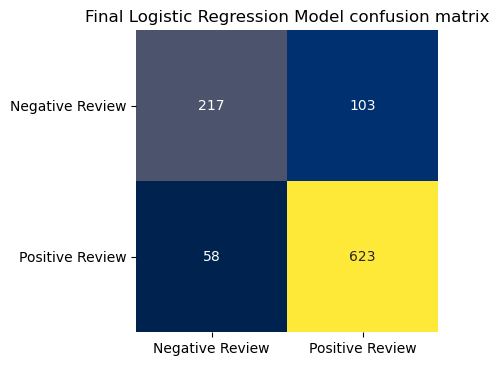

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
# Print confusion matrix for logistic regression for positive class.
final_logreg_confusion = confusion_matrix(y_test, upsampled_pred)
plt.figure(dpi=100)
sns.heatmap(final_logreg_confusion, fmt='d', cmap=plt.cm.cividis, annot=True, square=True, cbar=False,
           xticklabels=['Negative Review', 'Positive Review'],
           yticklabels=['Negative Review', 'Positive Review'])
# plt.xticks([1,2], labe;s)
plt.yticks(rotation=0)
#plt.xlabel('\nPredicted\n\n {}, {}, {}'.format(minority_recall, minority_precision, minority_fbeta), fontsize=10)
#plt.ylabel('Actual                 ', fontsize=10, rotation=0)
plt.title('Final Logistic Regression Model confusion matrix');

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,upsampled_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       320
           1       0.86      0.91      0.89       681

    accuracy                           0.84      1001
   macro avg       0.82      0.80      0.81      1001
weighted avg       0.84      0.84      0.84      1001



In [50]:
roc_auc_score(y_test,upsampled.predict(X_test))

0.7964780653450807

In [51]:
#LOG REGRESSION THAT GIVE FEATURES!
upsampled_coef = list(zip(X_train.columns,upsampled.coef_[0]))

In [52]:
upsampled_coef_df = pd.DataFrame(upsampled_coef)

In [53]:
# rename columns
upsampled_coef_df.rename(columns={0:'token',1:'log_reg_coefficient'},inplace=True)

In [54]:
upsampled_weights = upsampled_coef_df.sort_values(by = ['log_reg_coefficient'])

In [55]:
#g = upsampled_weights[upsampled_weights.log_reg_coefficient <0]

In [56]:
upsampled_weights[0:10]

,token,log_reg_coefficient
2027,rude,-0.875258
2727,worst,-0.802721
2429,terrible,-0.751990
225,bland,-0.699271
1170,horrible,-0.695633
2200,slow,-0.687595
480,cold,-0.658370
113,asked,-0.606134
650,decent,-0.587078
836,expect,-0.542036


In [57]:
upsampled_weights[2746:2756]

,token,log_reg_coefficient
2436,thank,0.615939
1720,perfect,0.638241
662,delicious,0.687156
1055,great,0.696150
140,awesome,0.719477
1392,loved,0.754182
205,best,0.852886
828,excellent,0.857179
889,favorite,0.875300
1391,love,0.875726


#### Exporting data for Streamlit app

In [58]:
#save final dataframe as csv
upsampled_weights.to_csv('/Users/gunnuparinandi/Desktop/unsampled_weights.csv')

In [59]:
data = pd.read_csv('/Users/gunnuparinandi/Desktop/unsampled_weights.csv')

In [101]:
data.head()

,token,log_reg_coefficient
0,rude,-0.875258
1,worst,-0.802721
2,terrible,-0.751990
3,bland,-0.699271
4,horrible,-0.695633


In [100]:
data[data.token=='cold']

,token,log_reg_coefficient
6,cold,-0.65837


In [63]:
print(data[data.token=='sad'].log_reg_coefficient)

25   -0.392672
Name: log_reg_coefficient, dtype: float64


In [65]:
len(data.token)

2757

#### TOPIC MODELING

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
review_sentiment.text

0       someone worked many museums eager visit galler...
1       actually horrified place still business year o...
2       love deagan really atmosphere cozy festive shr...
3       dismal lukewarm defrosted tasting texmex glop ...
4       oh happy day finally canes near casa yes other...
                              ...                        
4996    wanted try new nail place wish reason stars po...
4997    unfortunate recently moved neighborhood pretty...
4998    gorgeous romantic interiors spectacular food e...
4999    dr beecroft great unfortunately never know cha...
5000    love place big offers much not need go another...
Name: text, Length: 5001, dtype: object

In [71]:
#vectorizer = CountVectorizer(stop_words='english')

vectorizer= CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
doc_word = vectorizer.fit_transform(review_sentiment.text)
doc_word.shape

(5001, 2757)

In [72]:

dtm_lsa = pd.DataFrame(doc_word.toarray(), index=review_sentiment.text, columns=vectorizer.get_feature_names()).head(10)

In [73]:
# Latent Semantic Analysis (LSA) is just another name for Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD()
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.03535303, 0.01756742])

In [74]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names())
topic_word

,able,absolute,absolutely,accept,acceptable,access,accident,accommodate,accommodated,accommodating,...,yelpers,yes,yesterday,yoga,yogurt,york,young,yum,yummy,zero
component_1,0.021,0.003,0.018,0.001,0.002,0.002,0.002,0.002,0.001,0.003,...,0.003,0.015,0.007,0.001,0.003,0.004,0.006,0.004,0.011,0.003
component_2,0.038,0.003,0.012,0.003,0.002,0.002,0.005,0.001,0.001,0.002,...,0.003,0.013,0.009,0.002,-0.000,-0.001,0.007,-0.002,-0.010,0.008


In [75]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [76]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
food, good, place, like, great, service, time, really, got, restaurant

Topic  1
time, car, told, said, got, work, like, went, room, came


In [77]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = review_sentiment.text,
             columns = ["component_1","component_2"])
Vt

,component_1,component_2
text,,
someone worked many museums eager visit gallery recent trip las vegas saw would showing infamous eggs house faberge virginia museum fine arts vmfa knew go tucked away near gelateria garden gallery pretty much hidden view real estate agents would call cozy charming basically euphemism small said still see wonderful art gallery size two ask let tell pricing relatively inexpensive las vegas attraction completely top space amount art fit bit much not kid friendly seriously bring security not trained properly show curating design teams collaborate exhibitions definite flow means visitors view art certain sequence whether historical period cultural significance audio guides usually developed arrived gallery could not tell start security certainly not helpful told look around whatever fine institution find lack knowledge respect art appalling,1.11751,0.99898
actually horrified place still business year old son needed haircut past summer lure kids cut signs got door wait minutes stylists working people decor place total garbage tacky sofa time pleather sofa giant holes son noticed ants crawling floor furniture disgusting walked actually turned around walked upon entering older black male stylist finishes haircut turn tell want clipper around back sides hand cut top standard boys cut really freaking simple right wrong rather use clippers go actually cut hair went using moving downward cut hair rubs man alleged cosmetology license not know use set freaking clippers realized almost immediately no idea no idea minutes watching guy stumble said know fine paid left wanted get scummy joint take son real haircut place bottom line not go run way,2.90696,2.41807
love deagan really atmosphere cozy festive shrimp tacos house fries standbys fries sometimes good sometimes great spicy dipping sauce come die beer list amazing cocktails great prices mid level not cheap dive go every week rather treat try disappointed,1.63324,-0.62538
dismal lukewarm defrosted tasting texmex glop mumbly unengaged waiter clueless manager seeing us barely nibbled entreeson plates shoved forward pickup thanked usperfunctorily patronage texas hill country jail critters serve grub bad protection never never never back yard house real food,0.52479,-0.35664
oh happy day finally canes near casa yes others griping drive thru packed like canes area like go sit enjoy chicken cashiers pleasant far food wise yet receive funky chicken clean crew zips around dining area constantly usually well kept gripe one fella red hair makes rounds cleaning no smile personality nights ago tossed napkins put table help go meal done reached tray no excuse done realize trying job quickly little table manners goes along way said still like grub glad finally cane close,2.24650,0.42791
...,...,...
wanted try new nail place wish reason stars polish colors many chose got gel manicure even conifer manicure asked wanted nails cut filed asked shape got quick file came home filed ever polish sides nails male dis nails not back,1.18402,1.03569
unfortunate recently moved neighborhood pretty stoked several food establishments coventry weeks ago finished gym left handsome appetite ordered carry hunan convetry first last time ordered crab rangoons shrimp honey walnut kung pao beef pork chow fun little hungry carry order promptly ready pick got back home super excited immediately inhaled rangoons really screw fried wontons cream cheese sweet chili sauce think palate salt biased first time long time added salt among things shrimp pork entrees chow fun ranks pretty high list comfort foods broad doughy noodles full flavor expected nothing tasteless oil laden folds pasta food issues always cleaning plate always keeping leftovers never wasting many hungry people cavalier well two entrees ended trash mention starving ordered beef tried best salvage purposing next day would done better picking frozen entree ina garten trader joe,3.65818,0.09772
gorgeous romantic interiors spectacular food 

In [78]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = review_sentiment.text,
             columns = ["component_1","component_2" ])
Vt

,component_1,component_2
text,,
someone worked many museums eager visit gallery recent trip las vegas saw would showing infamous eggs house faberge virginia museum fine arts vmfa knew go tucked away near gelateria garden gallery pretty much hidden view real estate agents would call cozy charming basically euphemism small said still see wonderful art gallery size two ask let tell pricing relatively inexpensive las vegas attraction completely top space amount art fit bit much not kid friendly seriously bring security not trained properly show curating design teams collaborate exhibitions definite flow means visitors view art certain sequence whether historical period cultural significance audio guides usually developed arrived gallery could not tell start security certainly not helpful told look around whatever fine institution find lack knowledge respect art appalling,1.11751,0.99898
actually horrified place still business year old son needed haircut past summer lure kids cut signs got door wait minutes stylists working people decor place total garbage tacky sofa time pleather sofa giant holes son noticed ants crawling floor furniture disgusting walked actually turned around walked upon entering older black male stylist finishes haircut turn tell want clipper around back sides hand cut top standard boys cut really freaking simple right wrong rather use clippers go actually cut hair went using moving downward cut hair rubs man alleged cosmetology license not know use set freaking clippers realized almost immediately no idea no idea minutes watching guy stumble said know fine paid left wanted get scummy joint take son real haircut place bottom line not go run way,2.90696,2.41807
love deagan really atmosphere cozy festive shrimp tacos house fries standbys fries sometimes good sometimes great spicy dipping sauce come die beer list amazing cocktails great prices mid level not cheap dive go every week rather treat try disappointed,1.63324,-0.62538
dismal lukewarm defrosted tasting texmex glop mumbly unengaged waiter clueless manager seeing us barely nibbled entreeson plates shoved forward pickup thanked usperfunctorily patronage texas hill country jail critters serve grub bad protection never never never back yard house real food,0.52479,-0.35664
oh happy day finally canes near casa yes others griping drive thru packed like canes area like go sit enjoy chicken cashiers pleasant far food wise yet receive funky chicken clean crew zips around dining area constantly usually well kept gripe one fella red hair makes rounds cleaning no smile personality nights ago tossed napkins put table help go meal done reached tray no excuse done realize trying job quickly little table manners goes along way said still like grub glad finally cane close,2.24650,0.42791
...,...,...
wanted try new nail place wish reason stars polish colors many chose got gel manicure even conifer manicure asked wanted nails cut filed asked shape got quick file came home filed ever polish sides nails male dis nails not back,1.18402,1.03569
unfortunate recently moved neighborhood pretty stoked several food establishments coventry weeks ago finished gym left handsome appetite ordered carry hunan convetry first last time ordered crab rangoons shrimp honey walnut kung pao beef pork chow fun little hungry carry order promptly ready pick got back home super excited immediately inhaled rangoons really screw fried wontons cream cheese sweet chili sauce think palate salt biased first time long time added salt among things shrimp pork entrees chow fun ranks pretty high list comfort foods broad doughy noodles full flavor expected nothing tasteless oil laden folds pasta food issues always cleaning plate always keeping leftovers never wasting many hungry people cavalier well two entrees ended trash mention starving ordered beef tried best salvage purposing next day would done better picking frozen entree ina garten trader joe,3.65818,0.09772
gorgeous romantic interiors spectacular food 

In [79]:
Vt

,component_1,component_2
text,,
someone worked many museums eager visit gallery recent trip las vegas saw would showing infamous eggs house faberge virginia museum fine arts vmfa knew go tucked away near gelateria garden gallery pretty much hidden view real estate agents would call cozy charming basically euphemism small said still see wonderful art gallery size two ask let tell pricing relatively inexpensive las vegas attraction completely top space amount art fit bit much not kid friendly seriously bring security not trained properly show curating design teams collaborate exhibitions definite flow means visitors view art certain sequence whether historical period cultural significance audio guides usually developed arrived gallery could not tell start security certainly not helpful told look around whatever fine institution find lack knowledge respect art appalling,1.11751,0.99898
actually horrified place still business year old son needed haircut past summer lure kids cut signs got door wait minutes stylists working people decor place total garbage tacky sofa time pleather sofa giant holes son noticed ants crawling floor furniture disgusting walked actually turned around walked upon entering older black male stylist finishes haircut turn tell want clipper around back sides hand cut top standard boys cut really freaking simple right wrong rather use clippers go actually cut hair went using moving downward cut hair rubs man alleged cosmetology license not know use set freaking clippers realized almost immediately no idea no idea minutes watching guy stumble said know fine paid left wanted get scummy joint take son real haircut place bottom line not go run way,2.90696,2.41807
love deagan really atmosphere cozy festive shrimp tacos house fries standbys fries sometimes good sometimes great spicy dipping sauce come die beer list amazing cocktails great prices mid level not cheap dive go every week rather treat try disappointed,1.63324,-0.62538
dismal lukewarm defrosted tasting texmex glop mumbly unengaged waiter clueless manager seeing us barely nibbled entreeson plates shoved forward pickup thanked usperfunctorily patronage texas hill country jail critters serve grub bad protection never never never back yard house real food,0.52479,-0.35664
oh happy day finally canes near casa yes others griping drive thru packed like canes area like go sit enjoy chicken cashiers pleasant far food wise yet receive funky chicken clean crew zips around dining area constantly usually well kept gripe one fella red hair makes rounds cleaning no smile personality nights ago tossed napkins put table help go meal done reached tray no excuse done realize trying job quickly little table manners goes along way said still like grub glad finally cane close,2.24650,0.42791
...,...,...
wanted try new nail place wish reason stars polish colors many chose got gel manicure even conifer manicure asked wanted nails cut filed asked shape got quick file came home filed ever polish sides nails male dis nails not back,1.18402,1.03569
unfortunate recently moved neighborhood pretty stoked several food establishments coventry weeks ago finished gym left handsome appetite ordered carry hunan convetry first last time ordered crab rangoons shrimp honey walnut kung pao beef pork chow fun little hungry carry order promptly ready pick got back home super excited immediately inhaled rangoons really screw fried wontons cream cheese sweet chili sauce think palate salt biased first time long time added salt among things shrimp pork entrees chow fun ranks pretty high list comfort foods broad doughy noodles full flavor expected nothing tasteless oil laden folds pasta food issues always cleaning plate always keeping leftovers never wasting many hungry people cavalier well two entrees ended trash mention starving ordered beef tried best salvage purposing next day would done better picking frozen entree ina garten trader joe,3.65818,0.09772
gorgeous romantic interiors spectacular food 

#### TOPIC MODELING ON TOP TEN NEGATIVE WORDS

#### LSA

In [80]:
ls = ['rude','worst','terrible','bland','slow','cold','asked','decent','expect']

In [81]:
negative_review = []

In [82]:
#for i in range (len(review_sentiment)):
#    if(review_sentiment.iloc[i][0].find(ls)> 0):
#        print(review_sentiment.iloc[i][0])

In [83]:
for word in ls:
    for i in range (len(review_sentiment)):
        if(review_sentiment.iloc[i][0].find(word)> 0):
            negative_review.append(review_sentiment.iloc[i][0])

In [84]:
from pandas import DataFrame
negative_review = DataFrame(negative_review)
negative_review.rename(columns={0: "review"},inplace=True)

In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
#vectorizer = CountVectorizer(stop_words='english')

vectorizer= CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
doc_word = vectorizer.fit_transform(negative_review.review)
doc_word.shape

(1475, 1639)

In [88]:

dtm_lsa = pd.DataFrame(doc_word.toarray(), index=negative_review.review, columns=vectorizer.get_feature_names()).head(10)

In [89]:
# Latent Semantic Analysis (LSA) is just another name for Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.04252535, 0.02808573, 0.01832248, 0.01652048])

In [90]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = vectorizer.get_feature_names())
topic_word

,able,absolute,absolutely,accident,acknowledge,acknowledged,act,acted,actual,actually,...,year,years,yelp,yelpers,yes,yesterday,york,young,yummy,zero
component_1,0.024,0.005,0.015,0.004,0.001,0.003,0.005,0.003,0.004,0.042,...,0.017,0.027,0.015,0.003,0.017,0.009,0.004,0.006,0.004,0.006
component_2,0.033,0.002,0.006,0.011,0.004,0.003,0.009,0.004,-0.000,0.019,...,0.029,0.028,-0.010,0.002,0.009,0.004,-0.002,0.008,-0.005,0.013
component_3,-0.028,0.004,-0.002,-0.003,0.002,-0.001,-0.012,0.001,0.001,0.019,...,-0.020,-0.033,-0.015,-0.006,-0.009,0.004,-0.012,0.003,-0.004,-0.008
component_4,0.015,-0.002,-0.006,-0.001,-0.001,-0.001,0.009,-0.002,-0.004,0.019,...,-0.006,-0.000,-0.004,0.000,0.021,0.002,0.001,-0.012,0.005,0.000


In [91]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [92]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
food, good, service, time, like, place, asked, came, really, ordered

Topic  1
car, time, said, told, asked, went, customer, manager, got, minutes

Topic  2
food, order, came, table, minutes, ordered, waitress, asked, restaurant, arrived

Topic  3
place, came, ordered, time, order, got, sauce, wanted, rice, dish


In [94]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = negative_review.review,
             columns = ["component_1","component_2","component_3","component_4"])
Vt

,component_1,component_2,component_3,component_4
review,,,,
worst pedicure ever first waited half hour even though appointments girl rushed throughout made rude comments talked laughed coworkers different language pedicure chipped not even one week later never go back worse experience,0.34813,0.32193,-0.00746,-0.02901
place lame boyfriend decided check first night dude working club gave us free pass waited line half hour dealt rude doorman got um not much else said night going outside patio playing worst bad hip hop mash ups going inside trashy mid westerners dancing tables chugged drinks minutes,1.33911,0.78400,-0.26648,0.67410
regular veggie house thought cool try chef kenny went couple times usually great experience recently ordered spicy crispy beef came cold told waitress bring hotter rice pretend not hear request called back share experience shock actually put chef kenny phone first thought cool completely different expected instead understanding owner rude told next time come happens let know nothing already left sorry not next time going back veggie house treat customers respect also unfollowed chef kenny instagram well,2.48564,1.33194,0.42115,0.79407
called garcia bail bonds call answered greeted speak proceeded ask question type bond looking reply angry hell talking let person answering know must not want make money talking customers like hung may not known talking since never bail anyone however three bail bonds companies called prior question able provide answer minus horrible attitude would ever set foot business even handle simple task answering phone call update response reply course lost feel way think normal answer phone call place business greeting speak reply questions hell talking not remember anything never said anything california asked specific type bond not bond companies able provide specific type bond reply hell talking short conversation terminated conversation stated review no talk california included experience bail bonds companies review highlight easy call another business not treated rudely thank letting know poor customer service quickly made decision go else easy write hopes someone else not get stuck company get taste horrible customer service,2.97030,2.51963,-0.84234,-1.17788
absolutely love hanabi excellent service every visit quality remained top notch unlike locations never rude servers neglected service busy owner gone way ensure food well prepared properly attended highly recommend,1.16013,-0.11728,0.14883,-1.27739
...,...,...,...,...
first time cheesecake factory went sister birthday party started simplicity drinks husband got reserve table party jennifer came asked us wanted walked back forth opposite direction soda machine another nice gentlemen came make sure already taken care thinking back switched waiters chance drinks finally brought still havent gotten bread butter promised jennifer goes another minutes get us bread family gets deciding eat mind ive never im trouble trying choose entree ask jennifer recommends said im classy like plate like ghetto jennifer order chipotle pasta thing got alright ate really hungry wasnt best thing niece telling waitress sister birthday us expecting sing know tradition nope jennifer looked like crazy walked away didnt even say happy birthday fast forwarding check obviously split personally got check split number groups group husband sister family forth sees says oh awesome thanks splitting comes back says know tried helping found easier way like ok whatever works jennifer gives us back checks messed found easier way right claimed system messing table right clearing new families sitting dinner bad bad bad recommend jennifer,5.23853,2.22375,0.51851,2.41081
laura helpful every time called try schedule appointment due busy inconsistent schedule call times last able book next day couples massage schedule could fit got woman counter nice guided way lounges least women nice clean cozy lockers showers hair supplies sauna though magazines could better plac

#### NMF

In [95]:
vectorizer = CountVectorizer(stop_words = 'english')
doc_word = vectorizer.fit_transform(negative_review.review)
pd.DataFrame(doc_word.toarray(), index=negative_review.review, columns=vectorizer.get_feature_names()).head(10)

,____,___brand,aa,aaliyah,aaron,aback,abalone,abatement,abdominal,abiding,...,zombie,zombies,zone,zoo,zucchini,zuma,zupas,zuzu,zuzus,éclair
review,,,,,,,,,,,,,,,,,,,,,
worst pedicure ever first waited half hour even though appointments girl rushed throughout made rude comments talked laughed coworkers different language pedicure chipped not even one week later never go back worse experience,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
place lame boyfriend decided check first night dude working club gave us free pass waited line half hour dealt rude doorman got um not much else said night going outside patio playing worst bad hip hop mash ups going inside trashy mid westerners dancing tables chugged drinks minutes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
regular veggie house thought cool try chef kenny went couple times usually great experience recently ordered spicy crispy beef came cold told waitress bring hotter rice pretend not hear request called back share experience shock actually put chef kenny phone first thought cool completely different expected instead understanding owner rude told next time come happens let know nothing already left sorry not next time going back veggie house treat customers respect also unfollowed chef kenny instagram well,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
called garcia bail bonds call answered greeted speak proceeded ask question type bond looking reply angry hell talking let person answering know must not want make money talking customers like hung may not known talking since never bail anyone however three bail bonds companies called prior question able provide answer minus horrible attitude would ever set foot business even handle simple task answering phone call update response reply course lost feel way think normal answer phone call place business greeting speak reply questions hell talking not remember anything never said anything california asked specific type bond not bond companies able provide specific type bond reply hell talking short conversation terminated conversation stated review no talk california included experience bail bonds companies review highlight easy call another business not treated rudely thank letting know poor customer service quickly made decision go else easy write hopes someone else not get stuck company get taste horrible customer service,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely love hanabi excellent service every visit quality remained top notch unlike locations never rude servers neglected service busy owner gone way ensure food well prepared properly attended highly recommend,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
giving rating lowest available bought air conditioner one last summer nothing problems since first day installed not guy comes completely rude office seems back unit holds tons puron pretty big not cheap spent unit still warranty good thing people replace compressor blew yesterday morning making horrible noises shutting week ago came replaced thermostat air seemed work making even horrible noise nights ago stopped working altogether happens roommate going call yesterday anyway come fix however sudden heard loudest boom mean like bomb going literally louder shotgun fired close awful constant noise like never heard vapor coming hose valve funny smell know going panicked sure smoke puron ran house turned units made sure cats okay ran back outside real quick fire extinguishers case smoke roommate called said within hour two hours later little noon guy shows says compressor totally blew order another one going charge labor hour job going take compressor still warranty tried say problem faulty electrical end therefore not blame also said completely different issue thermostat claimed good call fix problem correctly hired electrician one extremely reputable come assess situation end knew needed not get fixed immediately safety reasons may owed guy apology insinuating could fault begin electrician came findings units close one

In [96]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(doc_word)

In [97]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = vectorizer.get_feature_names())
topic_word

,____,___brand,aa,aaliyah,aaron,aback,abalone,abatement,abdominal,abiding,...,zombie,zombies,zone,zoo,zucchini,zuma,zupas,zuzu,zuzus,éclair
component_1,0.000,0.000,0.000,0.004,0.000,0.001,0.007,0.002,0.000,0.000,...,0.001,0.002,0.006,0.008,0.003,0.001,0.035,0.002,0.005,0.001
component_2,0.007,0.001,0.023,0.000,0.023,0.005,0.000,0.000,0.004,0.022,...,0.001,0.002,0.005,0.000,0.002,0.000,0.000,0.000,0.000,0.000
component_3,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,...,0.000,0.000,0.005,0.002,0.000,0.000,0.001,0.000,0.002,0.000
component_4,0.001,0.000,0.002,0.000,0.000,0.000,0.000,0.001,0.001,0.000,...,0.001,0.002,0.000,0.001,0.000,0.000,0.000,0.003,0.000,0.000


In [98]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
food, good, place, like, service, really, restaurant, ordered, great, order

Topic  1
time, said, car, service, asked, told, like, came, went, got

Topic  2
neo, bar, soul, wings, chicken, stool, blue, martini, eat, restaurant

Topic  3
place, ur, security, drink, night, drinks, booth, way, kicked, time
